!pip install pysentimiento
https://pypi.org/project/pysentimiento/

In [82]:
#from google.colab import drive
#drive.mount('/content/drive')

In [83]:
#!pip install pysentimiento

In [84]:
import pandas as pd

from pysentimiento import create_analyzer

In [85]:
# Esta es una prueba de como funciona la libreria. 

#analyzer = create_analyzer(task="sentiment", lang="es")
#analisis_sentimiento = analyzer.predict("Qué gran jugador es Messi")
## returns 'POS'
#analyzer.predict("Esto es pésimo")
## returns 'NEG'
#analyzer.predict("Qué es esto?")
## returns 'NEU'

#analyzer.predict_probas("Dónde estamos?")

In [86]:
pd.set_option('max_colwidth', 800)

bancos = ['BBVA en España', 'Santander España', 'CaixaBank', 'Banco Sabadell', 'Bankinter']
ids = [230123496, 1372470686, 270429778, 9980072, 86031609]

id = 86031609

ruta = f'/content/drive/MyDrive/IEBS/Global Proyect/datos/cleaning-{id}.csv'
data_read = pd.read_csv(ruta)

In [87]:
data_read.head()

,Unnamed: 0,created_at,author_id,conversation_id,public_metrics,id,possibly_sensitive,lang,text,source,geo
0,0,2022-08-21 11:38:16+00:00,1557683568826097665,1561314204782583811,"{'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}",1561316752700706819,False,es,videos diarios mañaneros empiezo las mañanas con ellos me permiten estar al tanto de noticias e informacion actual luego me dirijo a telegram donde escucho el morning call de todo esto me ocupa m,Twitter Web App,NaN
1,1,2022-08-21 09:08:50+00:00,240580381,1561279147317542913,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561279147317542913,False,es,video en el que esther gutierrez explica las claves que moveran los mercados la proxima semana ⃣ analisis estrategiasemanal mercados bolsa https t co hmtikdtdw,Twitter Web App,NaN
2,2,2022-08-20 16:51:07+00:00,935869003,1561033095440113666,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561033095440113666,False,es,https t co ycxwxeqk a traves de,Twitter Web App,NaN
3,3,2022-08-20 15:38:51+00:00,92795010,1561014909185425408,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561014909185425408,False,es,increible el pesimo servicio de intento comunicarme para reportar un fraude en mi tarjeta de credito y la respuesta del bot que contesta es que llame de lunes a viernes de a si te roban un fin de semana...te jodes,Twitter for iPhone,NaN
4,4,2022-08-20 14:38:31+00:00,1197677741853872131,1559824927037046784,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1560999726073643011,False,es,increible la politica de bankinter años con vosotros no he dejado de pagar ni un solo recibo os pido que me deis una ampliacion de la hipoteca para comprar un coche y juntar dos tarjetas repuesta por que no unificamos deudas de otros gracias,Twitter for Android,NaN


In [88]:
%%time
diccionario_analisis = {'neg':[], 'neu':[], 'pos' : []}

analyzer = create_analyzer(task="sentiment", lang="es")

for indice_fila, fila in data_read.iterrows():
    analisis = analyzer.predict(fila.text)
    diccionario_analisis['neg'].append(analisis.probas['NEG'])
    diccionario_analisis['neu'].append(analisis.probas['NEU'])
    diccionario_analisis['pos'].append(analisis.probas['POS'])

loading configuration file https://huggingface.co/pysentimiento/robertuito-sentiment-analysis/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/034fd09e9530137fb6e6c042529972a92619fb02df8b40e7a4cfc50090943c46.98e658c5b8878c67807e3287b07db9608dbd08a5b69ce09979c447190bbe8077
Model config RobertaConfig {
  "_name_or_path": "pysentimiento/robertuito-sentiment-analysis",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEG",
    "1": "NEU",
    "2": "POS"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEG": 0,
    "NEU": 1,
    "POS": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 130,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidde

CPU times: user 2min 26s, sys: 1.56 s, total: 2min 27s
Wall time: 2min 29s


In [89]:
pd.DataFrame(diccionario_analisis).head()

,neg,neu,pos
0,0.002692,0.993364,0.003944
1,0.036513,0.947080,0.016407
2,0.016008,0.969812,0.014180
3,0.998357,0.001141,0.000502
4,0.649728,0.334568,0.015704


In [90]:
resultados = data_read.copy()
resultados = resultados[0:len(diccionario_analisis['neg'])]

for i in diccionario_analisis.keys():
    resultados[i] = diccionario_analisis[i]

In [91]:
resultados.shape

(712, 14)

In [92]:
resultados.head()

,Unnamed: 0,created_at,author_id,conversation_id,public_metrics,id,possibly_sensitive,lang,text,source,geo,neg,neu,pos
0,0,2022-08-21 11:38:16+00:00,1557683568826097665,1561314204782583811,"{'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}",1561316752700706819,False,es,videos diarios mañaneros empiezo las mañanas con ellos me permiten estar al tanto de noticias e informacion actual luego me dirijo a telegram donde escucho el morning call de todo esto me ocupa m,Twitter Web App,NaN,0.002692,0.993364,0.003944
1,1,2022-08-21 09:08:50+00:00,240580381,1561279147317542913,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561279147317542913,False,es,video en el que esther gutierrez explica las claves que moveran los mercados la proxima semana ⃣ analisis estrategiasemanal mercados bolsa https t co hmtikdtdw,Twitter Web App,NaN,0.036513,0.947080,0.016407
2,2,2022-08-20 16:51:07+00:00,935869003,1561033095440113666,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561033095440113666,False,es,https t co ycxwxeqk a traves de,Twitter Web App,NaN,0.016008,0.969812,0.014180
3,3,2022-08-20 15:38:51+00:00,92795010,1561014909185425408,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561014909185425408,False,es,increible el pesimo servicio de intento comunicarme para reportar un fraude en mi tarjeta de credito y la respuesta del bot que contesta es que llame de lunes a viernes de a si te roban un fin de semana...te jodes,Twitter for iPhone,NaN,0.998357,0.001141,0.000502
4,4,2022-08-20 14:38:31+00:00,1197677741853872131,1559824927037046784,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1560999726073643011,False,es,increible la politica de bankinter años con vosotros no he dejado de pagar ni un solo recibo os pido que me deis una ampliacion de la hipoteca para comprar un coche y juntar dos tarjetas repuesta por que no unificamos deudas de otros gracias,Twitter for Android,NaN,0.649728,0.334568,0.015704


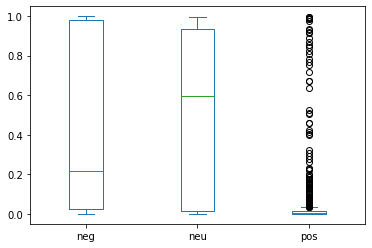

In [93]:
resultados[['neg','neu','pos']].plot(kind='box') #la amplia mayoría son neutros

CPU times: user 9.28 s, sys: 263 ms, total: 9.54 s
Wall time: 9.32 s


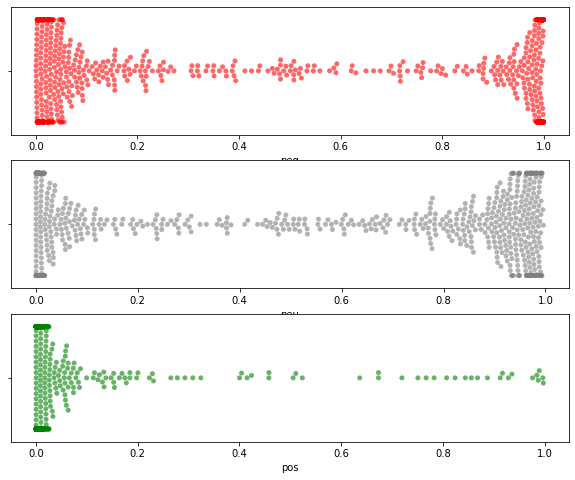

In [94]:
%%time
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,8))

sns.swarmplot(resultados.neg , ax = ax[0], color = 'red', alpha = 0.6)
sns.swarmplot(resultados.neu , ax = ax[1], color = 'grey', alpha = 0.6)
sns.swarmplot(resultados.pos , ax = ax[2], color = 'green', alpha = 0.6)

In [95]:
tags = ['neg' , 'neu', 'pos']

In [96]:
resultados[tags]

,neg,neu,pos
0,0.002692,0.993364,0.003944
1,0.036513,0.947080,0.016407
2,0.016008,0.969812,0.014180
3,0.998357,0.001141,0.000502
4,0.649728,0.334568,0.015704
...,...,...,...
707,0.005444,0.986101,0.008455
708,0.998688,0.001029,0.000283
709,0.997114,0.002567,0.000319
710,0.964958,0.033831,0.001211


In [97]:
resultados['score'] = resultados[tags].idxmax(axis=1)

In [98]:
resultados.head()

,Unnamed: 0,created_at,author_id,conversation_id,public_metrics,id,possibly_sensitive,lang,text,source,geo,neg,neu,pos,score
0,0,2022-08-21 11:38:16+00:00,1557683568826097665,1561314204782583811,"{'retweet_count': 0, 'reply_count': 1, 'like_count': 0, 'quote_count': 0}",1561316752700706819,False,es,videos diarios mañaneros empiezo las mañanas con ellos me permiten estar al tanto de noticias e informacion actual luego me dirijo a telegram donde escucho el morning call de todo esto me ocupa m,Twitter Web App,NaN,0.002692,0.993364,0.003944,neu
1,1,2022-08-21 09:08:50+00:00,240580381,1561279147317542913,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561279147317542913,False,es,video en el que esther gutierrez explica las claves que moveran los mercados la proxima semana ⃣ analisis estrategiasemanal mercados bolsa https t co hmtikdtdw,Twitter Web App,NaN,0.036513,0.947080,0.016407,neu
2,2,2022-08-20 16:51:07+00:00,935869003,1561033095440113666,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561033095440113666,False,es,https t co ycxwxeqk a traves de,Twitter Web App,NaN,0.016008,0.969812,0.014180,neu
3,3,2022-08-20 15:38:51+00:00,92795010,1561014909185425408,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1561014909185425408,False,es,increible el pesimo servicio de intento comunicarme para reportar un fraude en mi tarjeta de credito y la respuesta del bot que contesta es que llame de lunes a viernes de a si te roban un fin de semana...te jodes,Twitter for iPhone,NaN,0.998357,0.001141,0.000502,neg
4,4,2022-08-20 14:38:31+00:00,1197677741853872131,1559824927037046784,"{'retweet_count': 0, 'reply_count': 0, 'like_count': 0, 'quote_count': 0}",1560999726073643011,False,es,increible la politica de bankinter años con vosotros no he dejado de pagar ni un solo recibo os pido que me deis una ampliacion de la hipoteca para comprar un coche y juntar dos tarjetas repuesta por que no unificamos deudas de otros gracias,Twitter for Android,NaN,0.649728,0.334568,0.015704,neg


In [99]:
resultados[tags].idxmax(axis=1).value_counts()

neu    374
neg    311
pos     27
dtype: int64

In [100]:
resultados[tags].idxmax(axis=1).value_counts()

neu    374
neg    311
pos     27
dtype: int64

In [101]:
ruta_grabar = f'/content/drive/MyDrive/IEBS/Global Proyect/datos/scoreprueba/score-{id}.csv'

resultados.to_csv(ruta_grabar)